In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread

from sklearn.metrics import mean_absolute_error

In [2]:
import torch
import torch.utils.data as torch_data

In [14]:
def plot_img_phase_modul(output, title='', figsize=(14, 7)):
    
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    
    axs[0].imshow(output[0], cmap='gray')
    axs[1].imshow(20*np.log(output[1]+ 1e-9), cmap='gray')
    
    axs[0].set_title(f'phase: {title}', fontsize=10)
    axs[1].set_title(f'amplitude: {title}', fontsize=10)
    
    plt.show()

In [15]:
PATH_TO_DATA = 'D:\\SR_kspace\\data\\ax_t2_single_source_test'

In [16]:
class MRIPhaseAmpSampler(torch_data.Dataset):
    def __init__(self, path_to_data, shape=(1, 320, 320), seed=None, threshold=1e-7):
        super().__init__()

        self.images = [os.path.join(path_to_data, file) for file in os.listdir(path_to_data) 
                       if file.endswith('.npy')]
        self.images = sorted(self.images)

    def __len__(self):
        return len(self.images)
    
    def fftshift(self, gray):
        fft = np.fft.fft2(gray)
        fshift = np.fft.fftshift(fft)
        return fshift
    
    def phase_amp(self, slice):
        kspace = self.fftshift(slice)

        phase = np.angle(kspace)
        modul = np.abs(kspace)

        output = np.stack((phase, modul))
        return output

    def __getitem__(self, idx):

        slice = np.load(self.images[idx]).squeeze()
        output = self.phase_amp(slice)

        return output

In [17]:
def plot_ph_amp_sample(path):

    sampler = MRIPhaseAmpSampler(path)

    i = np.random.randint(0, len(sampler))
    output = sampler.__getitem__(i)

    return plot_img_phase_modul(output)

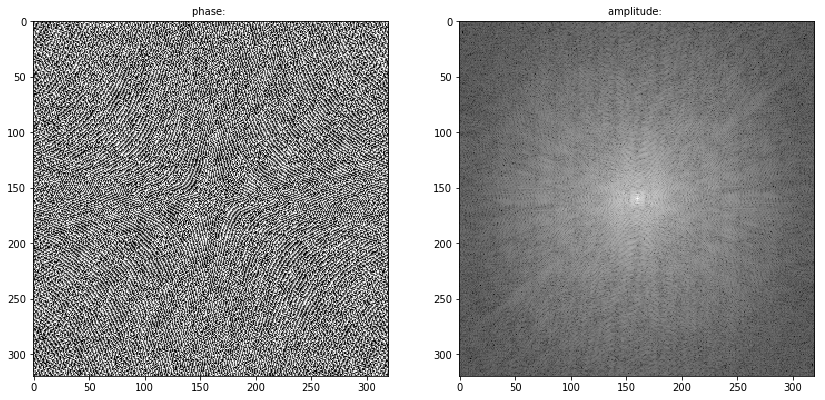

In [18]:
plot_ph_amp_sample(PATH_TO_DATA)